# Filtragem Digital 3

Esta atividade consiste em projetar diferentes filtros passa-altas e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy import signal

1) Considere o sinal x, a soma de 2 senoides.

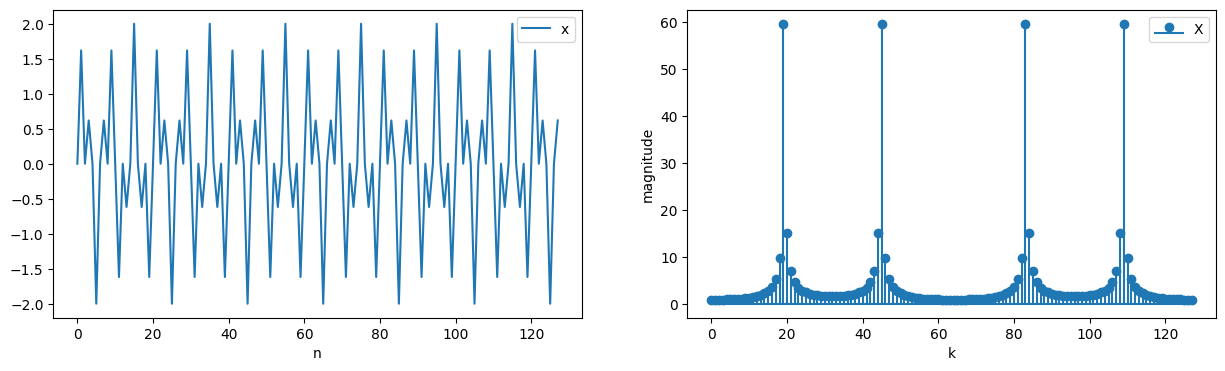

In [2]:
N=128
n=arange(N)
x1=sin(0.3*pi*n)
x2=sin(0.7*pi*n)
x=x1 + x2

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
ylabel('magnitude')
xlabel('k')
show()

2) Projete quatro filtros passa-altas de ordem 8 e freq. de corte=0.5. (butter, cheby1, cheby2, ellip).<br>
Plotar no mesmo eixo as respostas em frequência, de 0 a pi, juntamente com a FFT do sinal x. Plotar tambem em escala logaritmica a amplitude, com semilogy().

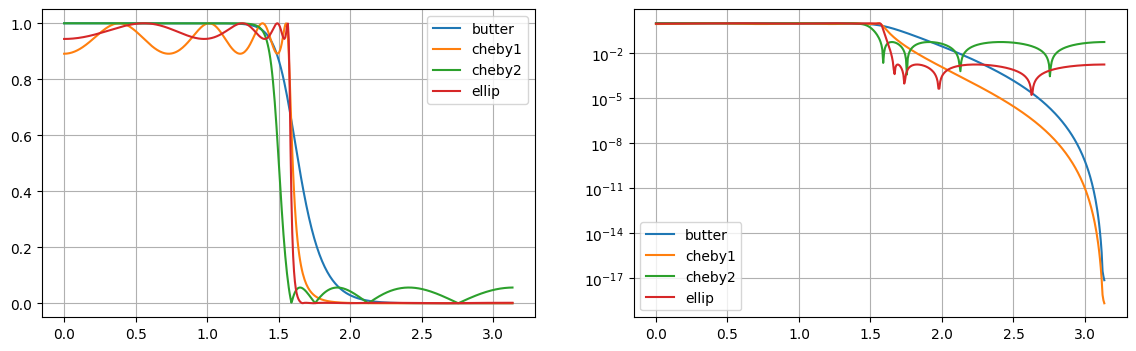

In [3]:
figure(figsize=(14,4))
subplot(1,2,1)
b,a = signal.butter(8,0.5)
w,h = signal.freqz(b,a)
y = linspace(0,pi,512,endpoint=False)
grid(True,which='both')
plot(y,abs(h),label='butter')
subplot(1,2,2)
grid(True,which='both')
semilogy(y,abs(h),label='butter')
b,a = signal.cheby1(8,1,0.5)
w,h = signal.freqz(b,a)
subplot(1,2,1)
plot(y,abs(h),label='cheby1')
subplot(1,2,2)
semilogy(y,abs(h),label='cheby1')
b,a = signal.cheby2(8,25,0.5)
w,h = signal.freqz(b,a)
subplot(1,2,1)
plot(y,abs(h),label='cheby2')
subplot(1,2,2)
semilogy(y,abs(h),label='cheby2')
b,a = signal.ellip(8,0.5,55,Wn=0.5)
w,h = signal.freqz(b,a)
subplot(1,2,1)
plot(y,abs(h),label='ellip')
legend()
subplot(1,2,2)
semilogy(y,abs(h),label='ellip')
legend()

2) Visualizar na mesma tela (com subplots) os diagramas de pólos e zeros.


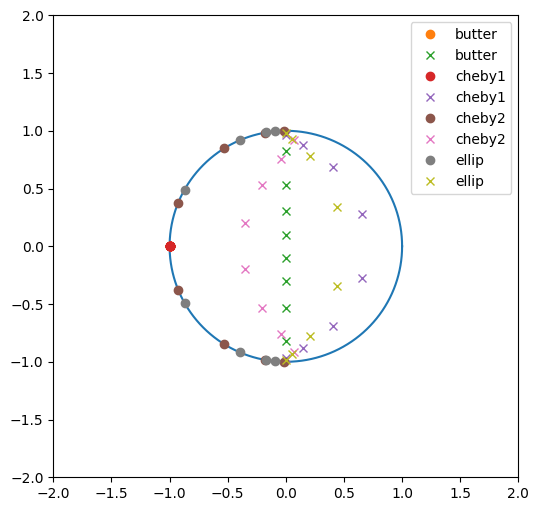

In [4]:
figure(figsize=(6,6))
y = linspace(0,2,8)
xlim([-2,2])
ylim([-2,2])
theta = np.linspace(0,2*pi,150) 
r = 1 
a = r * cos(theta)
b = r * sin(theta)
plot(a,b)
z,p,k = signal.butter(8,0.5,output='zpk')
plot(real(z),imag(z),marker='o',ls='none',label='butter')
plot(real(p),imag(p),marker='x',ls='none',label='butter')
z,p,k = signal.cheby1(8,1,0.5,output='zpk')
plot(real(z),imag(z),marker='o',ls='none',label='cheby1')
plot(real(p),imag(p),marker='x',ls='none',label='cheby1')
z,p,k = signal.cheby2(8,25,0.5,output='zpk')
plot(real(z),imag(z),marker='o',ls='none',label='cheby2')
plot(real(p),imag(p),marker='x',ls='none',label='cheby2')
z,p,k = signal.ellip(8,0.5,55,Wn=0.5,output='zpk')
plot(real(z),imag(z),marker='o',ls='none',label='ellip')
plot(real(p),imag(p),marker='x',ls='none',label='ellip')
legend()

4) Obter os sinais filtrados por cada filtro. 

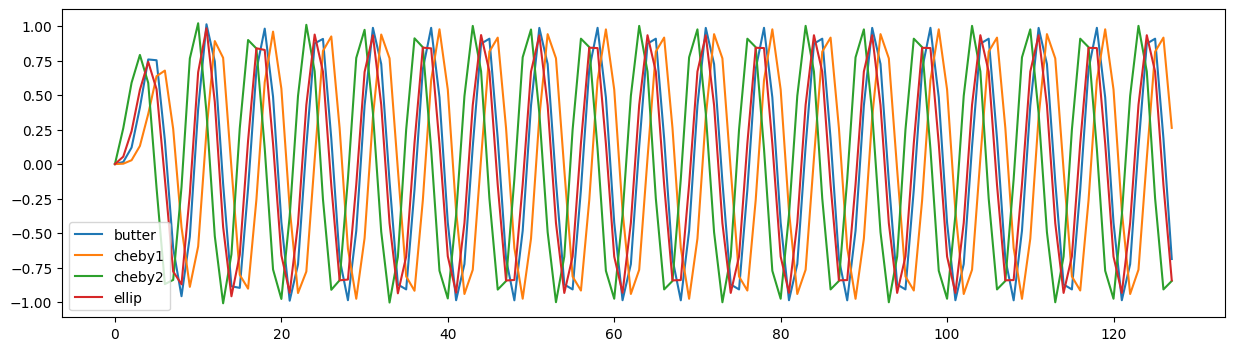

In [5]:
figure(figsize=(15,4))
sos = signal.butter(8,0.5,output='sos')
y = signal.sosfilt(sos,x)
sos = signal.cheby1(8,1,0.5,output='sos')
y1 = signal.sosfilt(sos,x)
sos = signal.cheby2(8,25,0.5,output='sos')
y2 = signal.sosfilt(sos,x)
sos = signal.ellip(8,0.5,55,Wn=0.5,output='sos')
y3 = signal.sosfilt(sos,x)
plot(y,label='butter')
plot(y1,label='cheby1')
plot(y2,label='cheby2')
plot(y3,label='ellip')
legend()

5) Plotar o espectro do sinal filtrado por cada filtro ne mesmo eixo. Repetir, numa escala logaritmica (semilogy())).

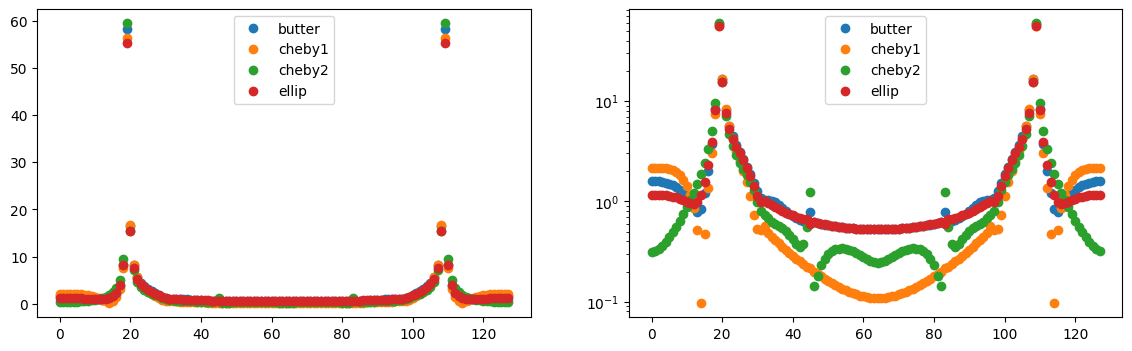

In [6]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(abs(fft(y)),marker='o',ls='none',label='butter')
plot(abs(fft(y1)),marker='o',ls='none',label='cheby1')
plot(abs(fft(y2)),marker='o',ls='none',label='cheby2')
plot(abs(fft(y3)),marker='o',ls='none',label='ellip')
legend()
subplot(1,2,2)
semilogy(abs(fft(y)),marker='o',ls='none',label='butter')
semilogy(abs(fft(y1)),marker='o',ls='none',label='cheby1')
semilogy(abs(fft(y2)),marker='o',ls='none',label='cheby2')
semilogy(abs(fft(y3)),marker='o',ls='none',label='ellip')
legend()